# This notebook talke the raw output from Hamiltonian Replica Exchange, extract the dihedral angle from xtc file using MdTraj, and ananlyze the autocoorelation curve

In [14]:
import os, sys, glob, shutil, re, pickle
import subprocess

import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
from IPython.display import Image, display
%matplotlib inline
nmer = 5
mpl.rcParams.update({'font.size': 16})

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

In [3]:
import os
import subprocess

HREX_dir = '../HREX'

HREX_list = [hrex for hrex in os.listdir(HREX_dir)]

for HREX in HREX_list:

    HREX_path = f"{HREX_dir}/{HREX}"    
    # Loop through each directory in the current working directory
    for state_dir in os.listdir(HREX_path):
        state_path = os.path.join(HREX_path, state_dir)
        if os.path.isdir(state_path) and state_dir.startswith('state_'):
    
            input_gro = os.path.join(state_path, 'HREMD.part0001.gro')
            output_gro = os.path.join(state_path, 'HREMD_peptoid_only.part0001.gro')
            index = os.path.join(state_path, 'index.ndx')
            command = f'echo "28\nq\n" | gmx editconf -f {input_gro} -n {index} -o {output_gro}'
            
            # Run the GROMACS command
            try:
                subprocess.run(command, shell=True, check=True)
                print(f"Processed {input_gro}")
            except subprocess.CalledProcessError as e:
                print(f"Failed to process {input_gro}: {e}")
           
            # Remove all files with # in their names
            rm_command = f'rm -f {os.path.join(state_path, "#*")}'
            try:
                subprocess.run(rm_command, shell=True, check=True)
                print(f"Removed # files in {state_path}")
            except subprocess.CalledProcessError as e:
                print(f"Failed to remove # files in {state_path}: {e}")


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_1/state_3/HREMD.part0001.gro -n ../HREX/HREX_1/state_3/index.ndx -o ../HREX/HREX_1/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.23 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_1/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_1/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.616 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_1/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_1/state_4


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.172 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_1/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_1/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.842 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_1/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_1/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_1/state_2/HREMD.part0001.gro -n ../HREX/HREX_1/state_2/index.ndx -o ../HREX/HREX_1/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.407 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_1/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_1/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.955 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_1/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_1/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_24/state_3/HREMD.part0001.gro -n ../HREX/HREX_24/state_3/index.ndx -o ../HREX/HREX_24/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.805 nm^3, corresponds to roughly 55700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_24/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_24/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.416 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_24/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_24/state_4


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.775 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_24/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_24/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.822 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_24/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_24/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_24/state_2/HREMD.part0001.gro -n ../HREX/HREX_24/state_2/index.ndx -o ../HREX/HREX_24/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.336 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_24/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_24/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.35 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_24/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_24/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_24/state_1/HREMD.part0001.gro -n ../HREX/HREX_24/state_1/index.ndx -o ../HREX/HREX_24/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.484 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_23/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_23/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.42 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_23/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_23/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_23/state_4/HREMD.part0001.gro -n ../HREX/HREX_23/state_4/index.ndx -o ../HREX/HREX_23/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.577 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_23/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_23/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.35 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_23/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_23/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_23/state_0/HREMD.part0001.gro -n ../HREX/HREX_23/state_0/index.ndx -o ../HREX/HREX_23/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.362 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_23/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_23/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.117 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_23/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_23/state_1



Back Off! I just backed up ../HREX/HREX_23/state_1/HREMD_peptoid_only.part0001.gro to ../HREX/HREX_23/state_1/#HREMD_peptoid_only.part0001.gro.1#

GROMACS reminds you: "I Can't Shake It" (Dinosaur Jr)

               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_6/state_3/HREMD.part0001.gro -n ../HREX/HREX_6/state_3/index.ndx -o ../HREX/HREX_6/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.738 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_6/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_6/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.045 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_6/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_6/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_6/state_4/HREMD.part0001.gro -n ../HREX/HREX_6/state_4/index.ndx -o ../HREX/HREX_6/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.117 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_6/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_6/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.445 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_6/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_6/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_6/state_2/HREMD.part0001.gro -n ../HREX/HREX_6/state_2/index.ndx -o ../HREX/HREX_6/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.418 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_6/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_6/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.276 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_6/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_6/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_6/state_1/HREMD.part0001.gro -n ../HREX/HREX_6/state_1/index.ndx -o ../HREX/HREX_6/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.094 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_15/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_15/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.144 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_15/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_15/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_15/state_5/HREMD.part0001.gro -n ../HREX/HREX_15/state_5/index.ndx -o ../HREX/HREX_15/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.579 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_15/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_15/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.869 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_15/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_15/state_2


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.027 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_15/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_15/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.703 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_15/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_15/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_15/state_1/HREMD.part0001.gro -n ../HREX/HREX_15/state_1/index.ndx -o ../HREX/HREX_15/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.451 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_8/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_8/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.783 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_8/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_8/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_8/state_5/HREMD.part0001.gro -n ../HREX/HREX_8/state_5/index.ndx -o ../HREX/HREX_8/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.774 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_8/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_8/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.981 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_8/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_8/state_2


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.533 nm^3, corresponds to roughly 54600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_8/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_8/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.328 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_8/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_8/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_8/state_1/HREMD.part0001.gro -n ../HREX/HREX_8/state_1/index.ndx -o ../HREX/HREX_8/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.896 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_12/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_12/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.369 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_12/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_12/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_12/state_5/HREMD.part0001.gro -n ../HREX/HREX_12/state_5/index.ndx -o ../HREX/HREX_12/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.685 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_12/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_12/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.74 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_12/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_12/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_12/state_0/HREMD.part0001.gro -n ../HREX/HREX_12/state_0/index.ndx -o ../HREX/HREX_12/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.476 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_12/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_12/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.718 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_12/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_12/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_9/state_3/HREMD.part0001.gro -n ../HREX/HREX_9/state_3/index.ndx -o ../HREX/HREX_9/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.975 nm^3, corresponds to roughly 55700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_9/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_9/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.068 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_9/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_9/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_9/state_5/HREMD.part0001.gro -n ../HREX/HREX_9/state_5/index.ndx -o ../HREX/HREX_9/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.675 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_9/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_9/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.311 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_9/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_9/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_9/state_0/HREMD.part0001.gro -n ../HREX/HREX_9/state_0/index.ndx -o ../HREX/HREX_9/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.893 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_9/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_9/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.877 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_9/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_9/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_13/state_3/HREMD.part0001.gro -n ../HREX/HREX_13/state_3/index.ndx -o ../HREX/HREX_13/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.45 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_13/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_13/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.688 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_13/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_13/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_13/state_5/HREMD.part0001.gro -n ../HREX/HREX_13/state_5/index.ndx -o ../HREX/HREX_13/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.517 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_13/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_13/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.82 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_13/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_13/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_13/state_0/HREMD.part0001.gro -n ../HREX/HREX_13/state_0/index.ndx -o ../HREX/HREX_13/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.538 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_13/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_13/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.267 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_13/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_13/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_14/state_3/HREMD.part0001.gro -n ../HREX/HREX_14/state_3/index.ndx -o ../HREX/HREX_14/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.839 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_14/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_14/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.967 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_14/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_14/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_14/state_5/HREMD.part0001.gro -n ../HREX/HREX_14/state_5/index.ndx -o ../HREX/HREX_14/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.16 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_14/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_14/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.323 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_14/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_14/state_2



Back Off! I just backed up ../HREX/HREX_14/state_2/HREMD_peptoid_only.part0001.gro to ../HREX/HREX_14/state_2/#HREMD_peptoid_only.part0001.gro.1#

GROMACS reminds you: "It's Against the Rules" (Pulp Fiction)

               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_14/state_0/HREMD.part0001.gro -n ../HREX/HREX_14/state_0/index.ndx -o ../HREX/HREX_14/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (       

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.621 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_14/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_14/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.234 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_14/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_14/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_14/state_1/HREMD.part0001.gro -n ../HREX/HREX_14/state_1/index.ndx -o ../HREX/HREX_14/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.842 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_7/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_7/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.179 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_7/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_7/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_7/state_4/HREMD.part0001.gro -n ../HREX/HREX_7/state_4/index.ndx -o ../HREX/HREX_7/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.725 nm^3, corresponds to roughly 54700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_7/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_7/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.221 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_7/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_7/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_7/state_2/HREMD.part0001.gro -n ../HREX/HREX_7/state_2/index.ndx -o ../HREX/HREX_7/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.622 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_7/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_7/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.011 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_7/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_7/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_22/state_3/HREMD.part0001.gro -n ../HREX/HREX_22/state_3/index.ndx -o ../HREX/HREX_22/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.741 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_22/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_22/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.711 nm^3, corresponds to roughly 54700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_22/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_22/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_22/state_5/HREMD.part0001.gro -n ../HREX/HREX_22/state_5/index.ndx -o ../HREX/HREX_22/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.906 nm^3, corresponds to roughly 55700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_22/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_22/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.391 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_22/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_22/state_2



Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 e

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.67 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_22/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_22/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.523 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_22/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_22/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_22/state_1/HREMD.part0001.gro -n ../HREX/HREX_22/state_1/index.ndx -o ../HREX/HREX_22/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.842 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_25/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_25/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.403 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_25/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_25/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_25/state_5/HREMD.part0001.gro -n ../HREX/HREX_25/state_5/index.ndx -o ../HREX/HREX_25/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.178 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_25/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_25/state_5



Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 e

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.182 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_25/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_25/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.864 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_25/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_25/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_25/state_1/HREMD.part0001.gro -n ../HREX/HREX_25/state_1/index.ndx -o ../HREX/HREX_25/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.143 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_25/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_25/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.82 nm^3, corresponds to roughly 55700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_30/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_30/state_3


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.588 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_30/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_30/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.723 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_30/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_30/state_5


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_30/state_5/HREMD.part0001.gro -n ../HREX/HREX_30/state_5/index.ndx -o ../HREX/HREX_30/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.205 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_30/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_30/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.413 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_30/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_30/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_30/state_0/HREMD.part0001.gro -n ../HREX/HREX_30/state_0/index.ndx -o ../HREX/HREX_30/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.581 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_30/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_30/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.739 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_20/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_20/state_3


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_20/state_3/HREMD.part0001.gro -n ../HREX/HREX_20/state_3/index.ndx -o ../HREX/HREX_20/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.015 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_20/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_20/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.455 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_20/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_20/state_5


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_20/state_2/HREMD.part0001.gro -n ../HREX/HREX_20/state_2/index.ndx -o ../HREX/HREX_20/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.2 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_20/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_20/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.412 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_20/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_20/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_20/state_1/HREMD.part0001.gro -n ../HREX/HREX_20/state_1/index.ndx -o ../HREX/HREX_20/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.143 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_20/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_20/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.689 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_5/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_5/state_3


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.433 nm^3, corresponds to roughly 54600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_5/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_5/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.726 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_5/state_5/HREMD.part0001.gro


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_5/state_5/HREMD.part0001.gro -n ../HREX/HREX_5/state_5/index.ndx -o ../HREX/HREX_5/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Removed # files in ../HREX/HREX_5/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.743 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_5/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_5/state_2



Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 e

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.531 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_5/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_5/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.337 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_5/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_5/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_5/state_1/HREMD.part0001.gro -n ../HREX/HREX_5/state_1/index.ndx -o ../HREX/HREX_5/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.418 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_18/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_18/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.197 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_18/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_18/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.662 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_18/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_18/state_5


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_18/state_5/HREMD.part0001.gro -n ../HREX/HREX_18/state_5/index.ndx -o ../HREX/HREX_18/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 124.004 nm^3, corresponds to roughly 55800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_18/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_18/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.583 nm^3, corresponds to roughly 54700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_18/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_18/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_18/state_1/HREMD.part0001.gro -n ../HREX/HREX_18/state_1/index.ndx -o ../HREX/HREX_18/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.101 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_18/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_18/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.648 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_2/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_2/state_3


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.556 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_2/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_2/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.291 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_2/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_2/state_5


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_2/state_5/HREMD.part0001.gro -n ../HREX/HREX_2/state_5/index.ndx -o ../HREX/HREX_2/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.875 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_2/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_2/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.729 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_2/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_2/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_2/state_1/HREMD.part0001.gro -n ../HREX/HREX_2/state_1/index.ndx -o ../HREX/HREX_2/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.866 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_2/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_2/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.023 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_27/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_27/state_3



Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 e

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.821 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_27/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_27/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_27/state_5/HREMD.part0001.gro -n ../HREX/HREX_27/state_5/index.ndx -o ../HREX/HREX_27/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.088 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_27/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_27/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.77 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_27/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_27/state_2


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.927 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_27/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_27/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.703 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_27/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_27/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_11/state_3/HREMD.part0001.gro -n ../HREX/HREX_11/state_3/index.ndx -o ../HREX/HREX_11/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.331 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_11/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_11/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 124.01 nm^3, corresponds to roughly 55800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_11/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_11/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_11/state_5/HREMD.part0001.gro -n ../HREX/HREX_11/state_5/index.ndx -o ../HREX/HREX_11/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.271 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_11/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_11/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.391 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_11/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_11/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_11/state_0/HREMD.part0001.gro -n ../HREX/HREX_11/state_0/index.ndx -o ../HREX/HREX_11/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.91 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_11/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_11/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.473 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_11/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_11/state_1


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.318 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_29/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_29/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.31 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_29/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_29/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_29/state_4/HREMD.part0001.gro -n ../HREX/HREX_29/state_4/index.ndx -o ../HREX/HREX_29/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.746 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_29/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_29/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.431 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_29/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_29/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_29/state_2/HREMD.part0001.gro -n ../HREX/HREX_29/state_2/index.ndx -o ../HREX/HREX_29/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.511 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_29/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_29/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.138 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_29/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_29/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_29/state_1/HREMD.part0001.gro -n ../HREX/HREX_29/state_1/index.ndx -o ../HREX/HREX_29/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.019 nm^3, corresponds to roughly 54900 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_16/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_16/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.218 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_16/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_16/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_16/state_5/HREMD.part0001.gro -n ../HREX/HREX_16/state_5/index.ndx -o ../HREX/HREX_16/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.035 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_16/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_16/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.517 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_16/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_16/state_2


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.763 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_16/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_16/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.851 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_16/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_16/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_16/state_1/HREMD.part0001.gro -n ../HREX/HREX_16/state_1/index.ndx -o ../HREX/HREX_16/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.958 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_28/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_28/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.025 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_28/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_28/state_4



GROMACS reminds you: "Between equal rights, force decides." (Karl Marx)

               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_28/state_4/HREMD.part0001.gro -n ../HREX/HREX_28/state_4/index.ndx -o ../HREX/HREX_28/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.438 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_28/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_28/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.653 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_28/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_28/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_28/state_0/HREMD.part0001.gro -n ../HREX/HREX_28/state_0/index.ndx -o ../HREX/HREX_28/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.296 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_28/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_28/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.929 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_28/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_28/state_1


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.69 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_17/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_17/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.065 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_17/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_17/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_17/state_4/HREMD.part0001.gro -n ../HREX/HREX_17/state_4/index.ndx -o ../HREX/HREX_17/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.342 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_17/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_17/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.334 nm^3, corresponds to roughly 54600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_17/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_17/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_17/state_2/HREMD.part0001.gro -n ../HREX/HREX_17/state_2/index.ndx -o ../HREX/HREX_17/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.666 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_17/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_17/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.692 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_17/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_17/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_10/state_3/HREMD.part0001.gro -n ../HREX/HREX_10/state_3/index.ndx -o ../HREX/HREX_10/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.721 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_10/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_10/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.764 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_10/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_10/state_4


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.939 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_10/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_10/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.796 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_10/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_10/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_10/state_2/HREMD.part0001.gro -n ../HREX/HREX_10/state_2/index.ndx -o ../HREX/HREX_10/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.867 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_10/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_10/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.972 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_10/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_10/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_19/state_3/HREMD.part0001.gro -n ../HREX/HREX_19/state_3/index.ndx -o ../HREX/HREX_19/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.956 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_19/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_19/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.371 nm^3, corresponds to roughly 55000 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_19/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_19/state_4


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.831 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_19/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_19/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.808 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_19/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_19/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_19/state_2/HREMD.part0001.gro -n ../HREX/HREX_19/state_2/index.ndx -o ../HREX/HREX_19/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.896 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_19/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_19/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.598 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_19/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_19/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_19/state_1/HREMD.part0001.gro -n ../HREX/HREX_19/state_1/index.ndx -o ../HREX/HREX_19/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.862 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_26/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_26/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.543 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_26/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_26/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_26/state_4/HREMD.part0001.gro -n ../HREX/HREX_26/state_4/index.ndx -o ../HREX/HREX_26/state_4/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 124.104 nm^3, corresponds to roughly 55800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_26/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_26/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 121.893 nm^3, corresponds to roughly 54800 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_26/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_26/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_26/state_2/HREMD.part0001.gro -n ../HREX/HREX_26/state_2/index.ndx -o ../HREX/HREX_26/state_2/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.746 nm^3, corresponds to roughly 55600 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_26/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_26/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.275 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_26/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_26/state_1


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_3/state_3/HREMD.part0001.gro -n ../HREX/HREX_3/state_3/index.ndx -o ../HREX/HREX_3/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.981 nm^3, corresponds to roughly 55700 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_3/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_3/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.265 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_3/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_3/state_4


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_3/state_5/HREMD.part0001.gro -n ../HREX/HREX_3/state_5/index.ndx -o ../HREX/HREX_3/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.166 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_3/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_3/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.798 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_3/state_2/HREMD.part0001.gro



Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 e

Removed # files in ../HREX/HREX_3/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.065 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_3/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_3/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_3/state_1/HREMD.part0001.gro -n ../HREX/HREX_3/state_1/index.ndx -o ../HREX/HREX_3/state_1/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.273 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_3/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_3/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.949 nm^3, corresponds to roughly 55300 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_4/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_4/state_3


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.749 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_4/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_4/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.584 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_4/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_4/state_5


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_4/state_5/HREMD.part0001.gro -n ../HREX/HREX_4/state_5/index.ndx -o ../HREX/HREX_4/state_5/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.575 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_4/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_4/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.391 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_4/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_4/state_0


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_4/state_0/HREMD.part0001.gro -n ../HREX/HREX_4/state_0/index.ndx -o ../HREX/HREX_4/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.857 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_4/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_4/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.593 nm^3, corresponds to roughly 55100 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_21/state_3/HREMD.part0001.gro
Removed # files in ../HREX/HREX_21/state_3


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_21/state_3/HREMD.part0001.gro -n ../HREX/HREX_21/state_3/index.ndx -o ../HREX/HREX_21/state_3/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.257 nm^3, corresponds to roughly 55400 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_21/state_4/HREMD.part0001.gro
Removed # files in ../HREX/HREX_21/state_4


Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has     1 elements
Group    11 (      MainChain) has     1 elements
Group    12 (   MainChain+Cb) has     1 elements
Group    13 (    MainChain+H) has     3 elements
Group    14 (      SideChain) has     0 elements
Group    15 (    SideChain-H) has     0 elements
Group    16 (    Prot-Masses) has     3 elements
Group    17 (    non-Protein) has 12127 elements
Group    18 (          Water) has 12030 elements
Group    19 (            SOL) has 12030 elements
Group    20 (      n

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.812 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_21/state_5/HREMD.part0001.gro
Removed # files in ../HREX/HREX_21/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.513 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_21/state_2/HREMD.part0001.gro
Removed # files in ../HREX/HREX_21/state_2


               :-) GROMACS - gmx editconf, 2024.4-conda_forge (-:

Executable:   /Users/starwingchen/anaconda3/envs/PeptoidFF/bin.AVX2_256/gmx
Data prefix:  /Users/starwingchen/anaconda3/envs/PeptoidFF
Working dir:  /Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis
Command line:
  gmx editconf -f ../HREX/HREX_21/state_0/HREMD.part0001.gro -n ../HREX/HREX_21/state_0/index.ndx -o ../HREX/HREX_21/state_0/HREMD_peptoid_only.part0001.gro


Select a group for output:
Group     0 (         System) has 12130 elements
Group     1 (          Other) has    79 elements
Group     2 (            HCP) has     1 elements
Group     3 (            Q03) has    32 elements
Group     4 (            R07) has    46 elements
Group     5 (             NA) has     8 elements
Group     6 (             CL) has    10 elements
Group     7 (        Protein) has     3 elements
Group     8 (      Protein-H) has     1 elements
Group     9 (        C-alpha) has     0 elements
Group    10 (       Backbone) has 

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 123.357 nm^3, corresponds to roughly 55500 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_21/state_0/HREMD.part0001.gro
Removed # files in ../HREX/HREX_21/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 12130 atoms
Volume: 122.718 nm^3, corresponds to roughly 55200 electrons
Velocities found
Selected 28: 'peptoid'
Processed ../HREX/HREX_21/state_1/HREMD.part0001.gro
Removed # files in ../HREX/HREX_21/state_1



GROMACS reminds you: "It's more useful when you know what you're doing." (Artem Zhmurov)



In [13]:
# Define the directory path
directory = "omega_data/"

remove_and_clean = False

# Check if the directory exists
if os.path.exists(directory):
    if remove_and_clean:
        # Remove all contents of the directory
        shutil.rmtree(directory)
        # Recreate the empty directory
        os.makedirs(directory)
        print(f"All contents in '{directory}' have been cleared.")
    else:
        print(f"Directory '{directory}' already exists. No action taken.")
else:
    # Create the directory if it does not exist
    os.makedirs(directory)
    print(f"Directory '{directory}' did not exist, so it has been created.")

Directory 'omega_data/' already exists. No action taken.


In [5]:
# hand input the omega indices:
# Define omega dihedral indices, gromcas start from 1, while np start from 0
gmx_dihedral_indices = np.array([
    [6, 7, 18, 36],
    [36, 39, 41, 45],
    [45, 46, 57, 75]

])

omega_dihedral_indices = gmx_dihedral_indices - 1
print(omega_dihedral_indices)

# Ensure the omega_data directory exists
omega_path = 'omega_data/'
if not os.path.exists(omega_path):
    os.makedirs(omega_path)

HREX_dir = '../HREX'

HREX_list = [hrex for hrex in os.listdir(HREX_dir)]

for state in range(6):
    omegas_list = []
    for HREX in HREX_list:
        HREX_path = f"{HREX_dir}/{HREX}"  

        xtcfile = f"{HREX_path}/state_{state}/HREMD.part0001.xtc"
        grofile = f"{HREX_path}/state_{state}/HREMD_peptoid_only.part0001.gro"
        
        # Load the trajectory
        traj = md.load(xtcfile, top=grofile)
        
        # Compute omega dihedrals
        omegas = md.compute_dihedrals(traj, omega_dihedral_indices) * (180.0 / math.pi)
        omegas_list.append(omegas)
    # Save omegas
    concatenated_omegas = np.vstack(omegas_list)
    data_object = Data(concatenated_omegas)
    save_path = f"{omega_path}omegas_state{state}.pkl"
    data_object.save(save_path)
    print(f"Saved omegas for state {state} to {save_path}")

[[ 5  6 17 35]
 [35 38 40 44]
 [44 45 56 74]]
Saved omegas for state 0 to omega_data/omegas_state0.pkl
Saved omegas for state 1 to omega_data/omegas_state1.pkl
Saved omegas for state 2 to omega_data/omegas_state2.pkl
Saved omegas for state 3 to omega_data/omegas_state3.pkl
Saved omegas for state 4 to omega_data/omegas_state4.pkl
Saved omegas for state 5 to omega_data/omegas_state5.pkl


In [6]:
data_path = 'omega_data/omegas_state0.pkl'

# Load the data
loaded_data = Data.load(data_path)
# Access the list of arrays
array_list = loaded_data.array_list

# Print a slice of the data
print(array_list[200000:200010])
# Print the shape
print(np.array(array_list).shape)

[[-171.1704      21.361874   167.74767  ]
 [-160.03076     -2.7102902 -173.69308  ]
 [ 177.12657    -12.3762865 -159.85796  ]
 [-169.88905    -12.012291   -21.530937 ]
 [ 165.68546    -10.193101    10.761872 ]
 [ 169.14542    -17.940546   -20.61819  ]
 [-170.83876    -21.811201   -30.44167  ]
 [-154.67508      4.1331606 -155.15495  ]
 [-170.8337      10.546189  -149.6279   ]
 [ 169.2866       9.014535    14.595161 ]]
(600030, 3)


### What is the time interval between `*.xtc` snapshots?

In [8]:
dt_in_ns = 0.010   #  ns

### What are the dimensions of the omega-angle arrays in each Hamiltonian state? 

In [9]:
nstates = 6

for i in range(nstates):
    omega_path = f"omega_data/omegas_state{i}.pkl"
    omegas = Data.load(omega_path)
    omegas = omegas.array_list
    print(f'state {i}:, {np.array(omegas).shape}')

state 0:, (600030, 3)
state 1:, (600030, 3)
state 2:, (600030, 3)
state 3:, (600030, 3)
state 4:, (600030, 3)
state 5:, (600030, 3)


In [10]:
HREX_dir = '../HREX'
HREX_list = [hrex for hrex in os.listdir(HREX_dir)]

current_state = [0, 1, 2, 3, 4, 5]

pattern = 'Repl ex'
output_file = 'replica_indices.dat'

states = []
states.append( current_state.copy() ) # Make a copy of initial_state

# DEbug:  Let's see if xtc is written BEFORE swap 
states.append( current_state.copy() ) # Make a copy of initial_state

VERBOSE = False

for HREX in HREX_list:
    HREX_path = f"{HREX_dir}/{HREX}"
    try:
        logfile = os.path.join(HREX_path , 'state_0/HREMD.part0001.log')
        with open(logfile, 'r') as file:
            lines = file.readlines()

            for line in lines:
                if pattern in line:
                    parts = line.strip().split()
                    if VERBOSE:
                        print(f'parts: {parts}')
                    for i in range(2, len(parts)):
                        if 'x' in parts[i]:
                            index1 = int(parts[i-1])
                            index2 = int(parts[i+1])
                            
                            # Swap the positions in the current state
                            tmp1, tmp2 = current_state[index1], current_state[index2]
                            current_state[index1] = tmp2
                            current_state[index2] = tmp1
                    states.append(current_state.copy())  # Append a copy of the last state
        
        # Append twice for the last frame
        states.append(current_state.copy())
        states.append(current_state.copy())

    except FileNotFoundError:
        print(f"The file {logfile} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Remove the final two lines from states
if len(states) > 2:
    states = states[:-2]


# Write states to output_file
with open(output_file, 'w') as outfile:
    for state in states:
        outfile.write(' '.join(map(str, state)) + '\n')

print(f"Output saved to {output_file}")


Output saved to replica_indices.dat


In [11]:
all_omegas = [] # Load in the omega values for all replicas

for state in range(6):  # Adjust the range to include all replicas
    omega_path = f"omega_data/omegas_state{state}.pkl"
    omegas = Data.load(omega_path)
    omegas = omegas.array_list
    all_omegas.append(np.array(omegas))
all_omegas = np.array(all_omegas)  # (nreps, nsnaps, nresidues)
print('all_omegas.shape', all_omegas.shape)
#print(all_omegas[:5])

# Arrange each snapshot by replica (not temp)
replica_indices = np.loadtxt('replica_indices.dat')
print("replica_indices.shape", replica_indices.shape)
#print(replica_indices)

all_omegas_by_replica = np.zeros(all_omegas.shape)

start = 0
nsnaps = 600030
nreps = 6
for i in range(nsnaps):
    Ind = np.argsort(replica_indices[i, :])
    all_omegas_by_replica[:, i, :] = all_omegas[Ind, i, :]

# Save the data for each state once
for rep in range(nreps):
    save_path = f"omega_data/omegas_rep{rep}.pkl"
    rep_object = Data(all_omegas_by_replica[rep, :, :])
    rep_object.save(save_path)
    print(f"Saved omegas for replica {rep} to {save_path}")
    #print(np.load(f'omega_data/omegas_rep{rep}.npy')[:5])

all_omegas.shape (6, 600030, 3)
replica_indices.shape (600030, 6)
Saved omegas for replica 0 to omega_data/omegas_rep0.pkl
Saved omegas for replica 1 to omega_data/omegas_rep1.pkl
Saved omegas for replica 2 to omega_data/omegas_rep2.pkl
Saved omegas for replica 3 to omega_data/omegas_rep3.pkl
Saved omegas for replica 4 to omega_data/omegas_rep4.pkl
Saved omegas for replica 5 to omega_data/omegas_rep5.pkl


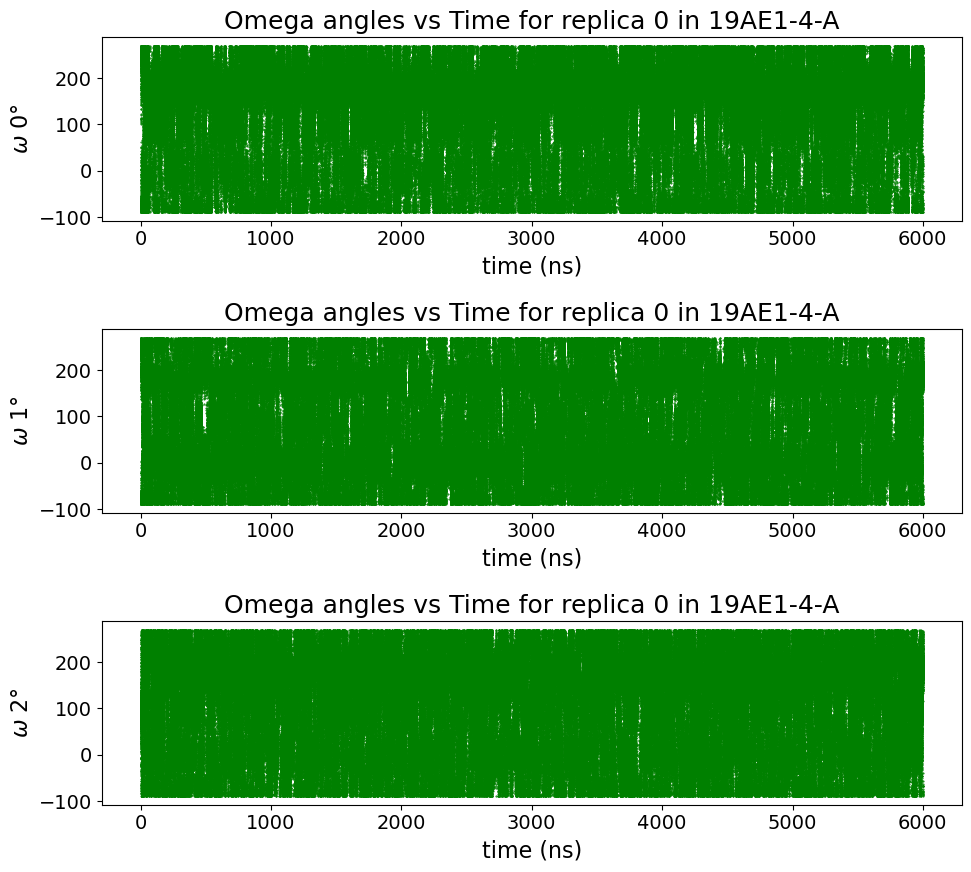

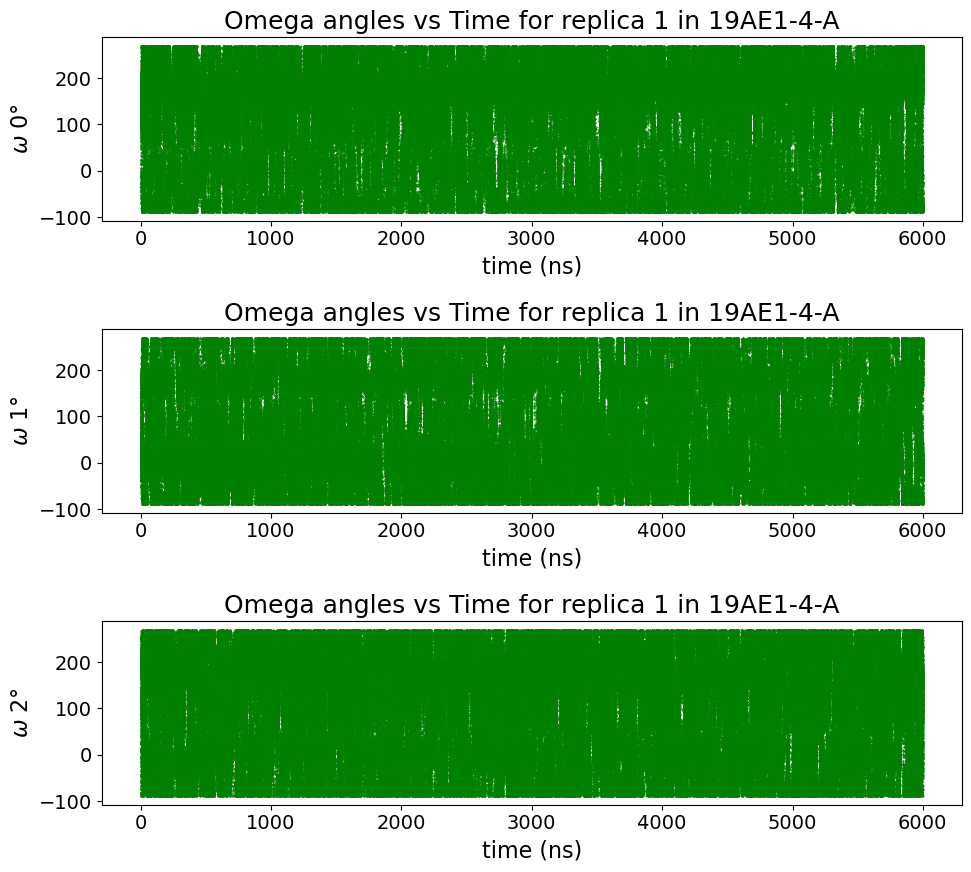

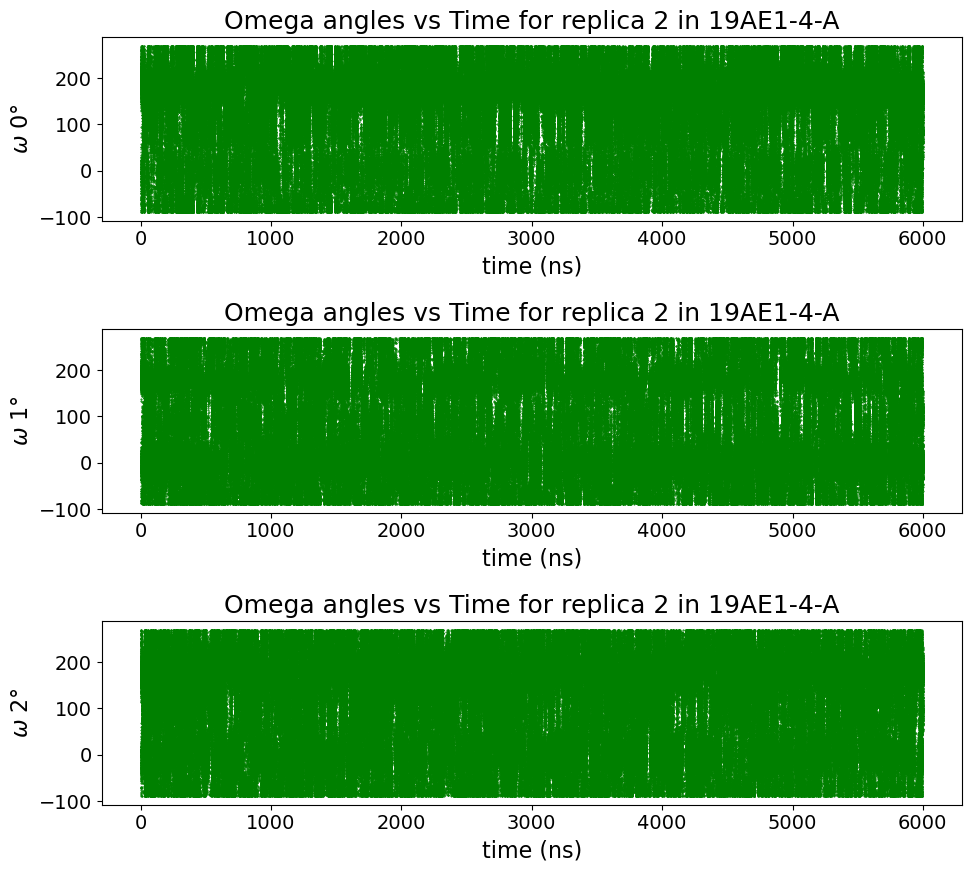

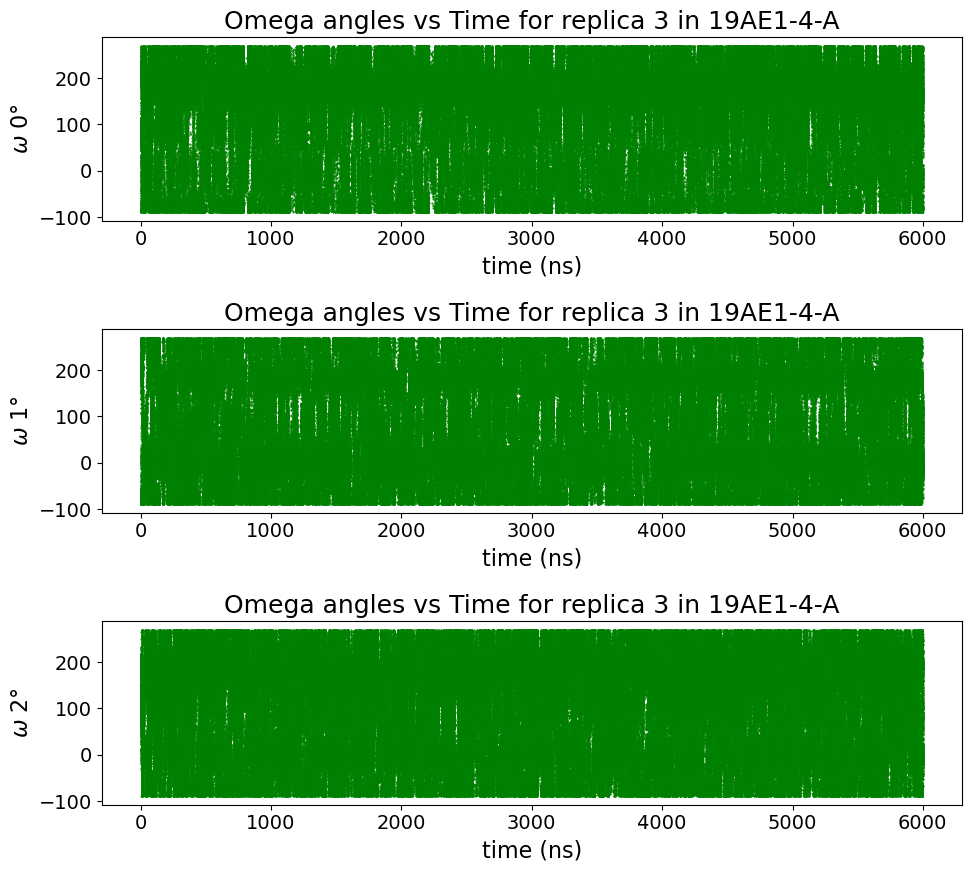

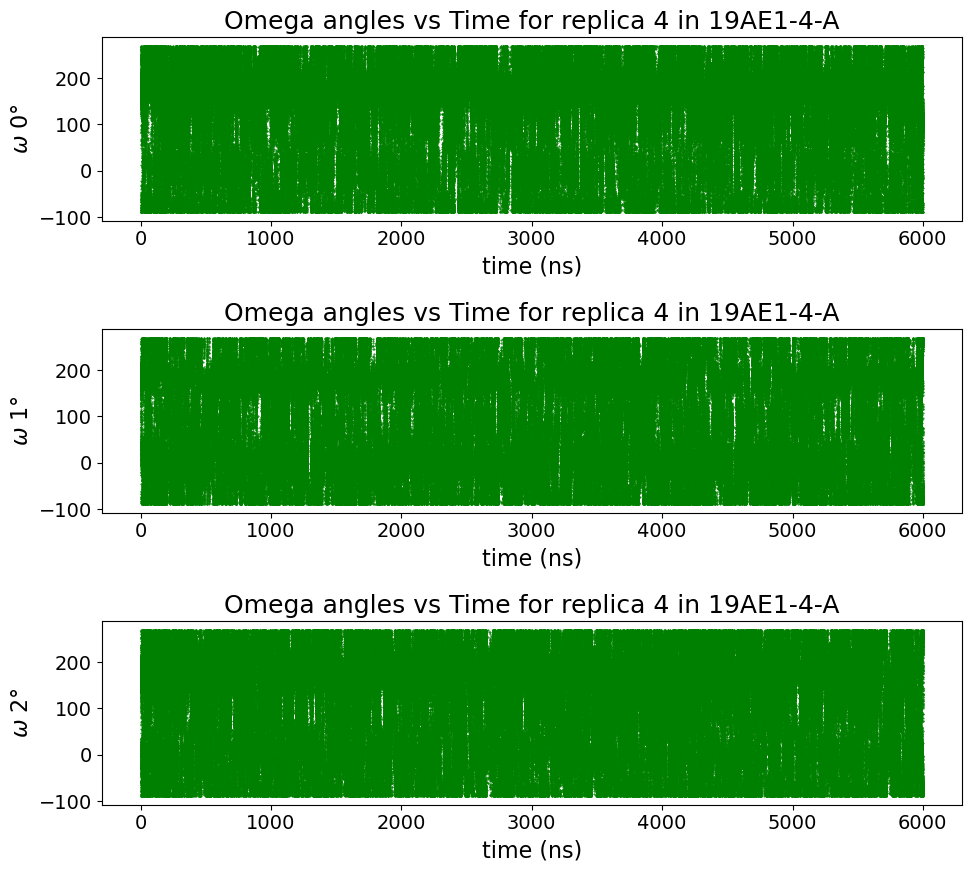

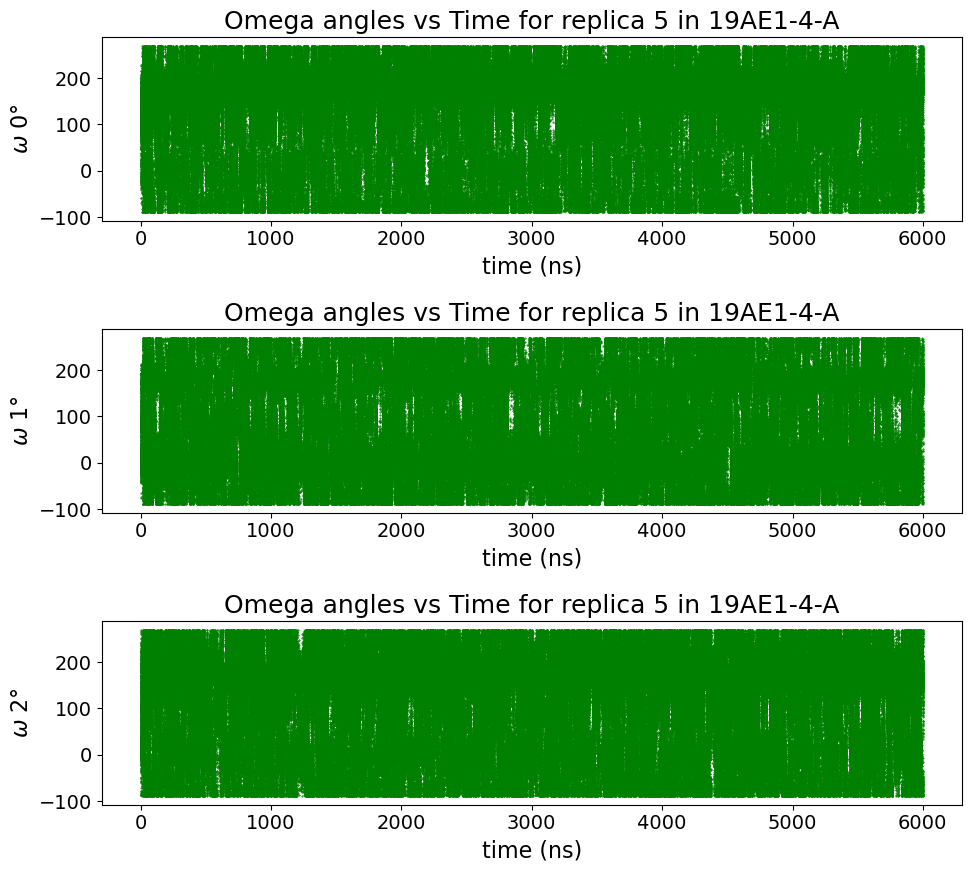

In [12]:
# Adjust omega values into the range (-90, 270)
all_omegas_by_replica = (all_omegas_by_replica + 90.0) % 360.0 - 90.0

start = 0
nsnaps = 600030
nreps = 6
residues_to_plot = [0, 1, 2]
num_residues = len(residues_to_plot)

ShowPlots = True

# Set default font sizes globally
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=18)   # legend fontsize

# Plot omega angles vs time for selected residues for each replica
for i in range(nreps):
    plt.figure(figsize=(10, 9))
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(num_residues, 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, all_omegas_by_replica[i, start:nsnaps, residue], '.', ms=1, color='green')
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ {residue}°')
        plt.title(f'Omega angles vs Time for replica {i} in 19AE1-4-A')
        
    plt.tight_layout()
    if ShowPlots:
        plt.show()
    else:
        outfilename = f'omega_data/Omega_angles_vs_Time_Replica_{i}_in_19AE1-4-A.png'
        plt.savefig(outfilename, format='png', transparent=True, dpi=600)
        print(f"Saved at: {outfilename}")
        plt.clf()  # Clear the figure for the next set of plots

### Omega Density Plot

#### For each state 

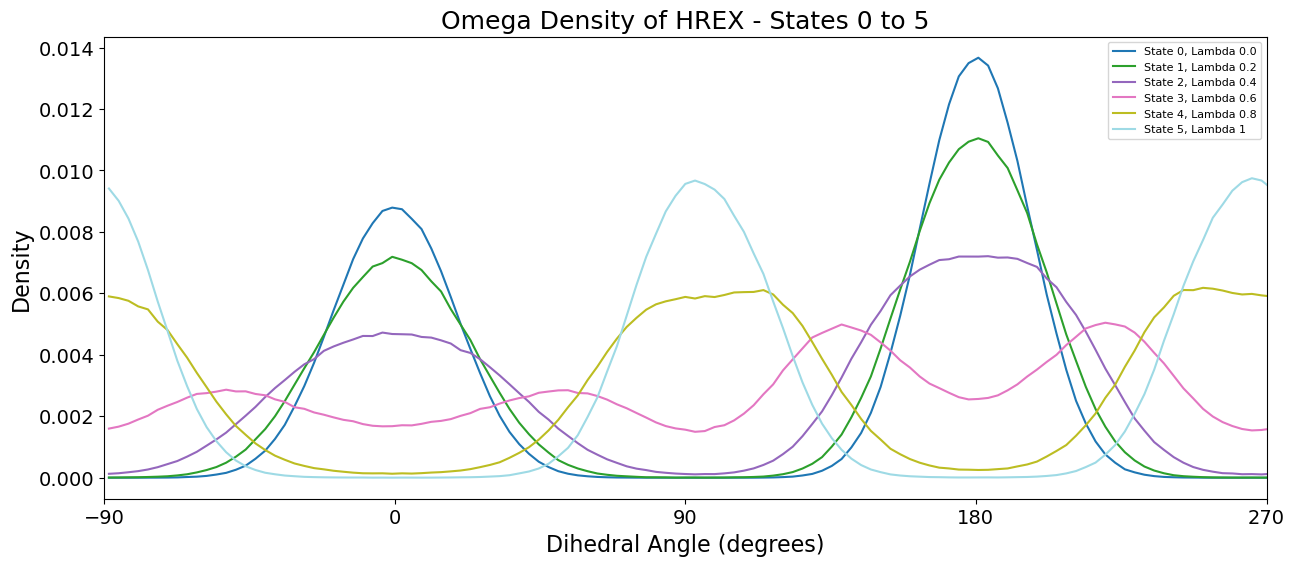

In [22]:
save_dir = 'omega_data'
num_states = 6
lambda_val = ['0.0', '0.2', '0.4', '0.6', '0.8', '1']

fig, ax = plt.subplots(figsize=(15, 6))
cmap = cm.get_cmap('tab20', num_states)
colors = [cmap(i) for i in range(num_states)]

for state in range(num_states):
    omega = Data.load(f"{save_dir}/omegas_state{state}.pkl").array_list  # Load each state
    combined_omega = np.vstack(omega)
    combined_omega = (combined_omega + 90.0) % 360.0 - 90.0

    bins = np.linspace(-90, 270, 120)
    counts, bin_edges = np.histogram(combined_omega, bins=bins, density=True)
    counts = np.concatenate([counts, counts[:1]])
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_centers = np.append(bin_centers, bin_centers[0] + 360)

    ax.plot(bin_centers, counts, color=colors[state], label=f'State {state}, Lambda {lambda_val[state]}')

ax.set_title('Omega Density of HREX - States 0 to 5')
ax.set_xlabel('Dihedral Angle (degrees)')
ax.set_ylabel('Density')
ax.set_xlim([-90, 270])
ax.set_xticks([-90, 0, 90, 180, 270])
ax.legend(loc='best', fontsize=8)

plt.show()


#### Each Replica 

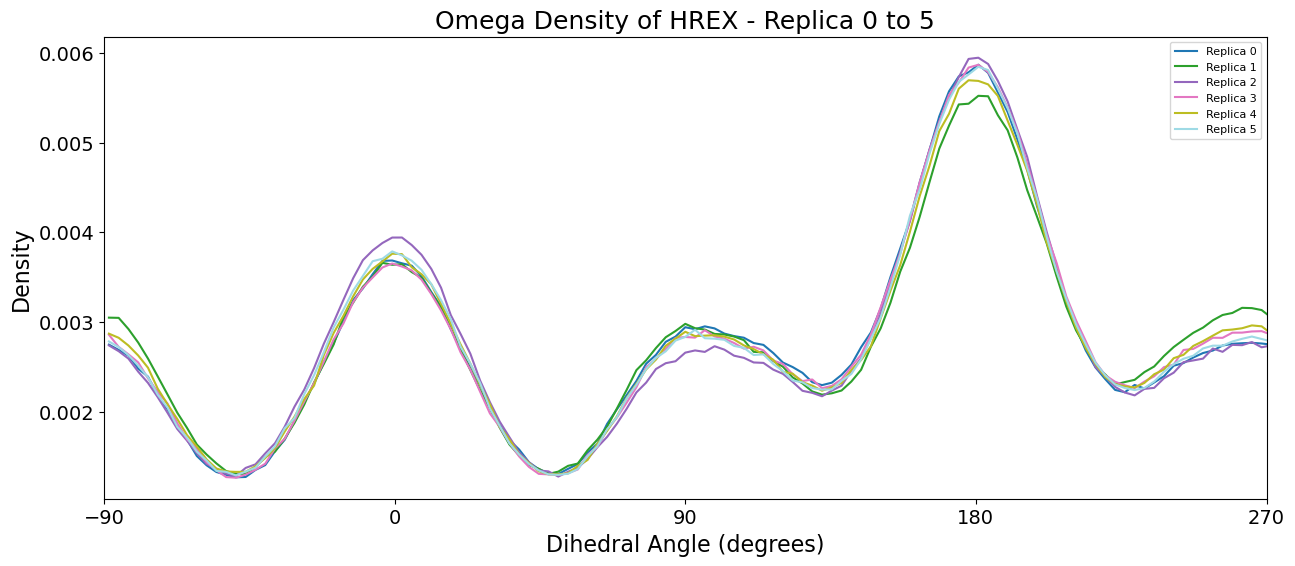

In [27]:
save_dir = 'omega_data'
num_rep = 6

fig, ax = plt.subplots(figsize=(15, 6))
cmap = cm.get_cmap('tab20', num_rep)
colors = [cmap(i) for i in range(num_rep)]

for rep in range(num_rep):
    omega = Data.load(f"{save_dir}/omegas_rep{rep}.pkl").array_list  # Load each state
    combined_omega = np.vstack(omega)
    combined_omega = (combined_omega + 90.0) % 360.0 - 90.0

    bins = np.linspace(-90, 270, 120)
    counts, bin_edges = np.histogram(combined_omega, bins=bins, density=True)
    counts = np.concatenate([counts, counts[:1]])
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_centers = np.append(bin_centers, bin_centers[0] + 360)

    ax.plot(bin_centers, counts, color=colors[rep], label=f'Replica {rep}')

ax.set_title('Omega Density of HREX - Replica 0 to 5')
ax.set_xlabel('Dihedral Angle (degrees)')
ax.set_ylabel('Density')
ax.set_xlim([-90, 270])
ax.set_xticks([-90, 0, 90, 180, 270])
ax.legend(loc='best', fontsize=8)

plt.show()
